   # TP53: Effects of Mutation on CABLES1

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

### We originally tested 78 proteins, so our adjusted p-value is:

In [12]:
p_cutoff = 0.05 / 78
p_cutoff

0.000641025641025641

### CABLES1 mutation and CABLES1 proteome abundance
<b>Note: We are doing this as a check to make sure the changes we're seeing in CABLES1 aren't due to mutations in CABLES1 itself</b>

In [4]:
gene = "CABLES1"
protein = "CABLES1"

cablesCross = CPTAC.compare_mutations(proteomics, gene)
cablesCross = cablesCross.loc[cablesCross['Patient_Type'] == 'Tumor'][["Mutation", protein]].dropna(axis=0)

CABLES1mutated = cablesCross.loc[cablesCross["Mutation"] != "Wildtype"]
CABLES1wt = cablesCross.loc[cablesCross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(CABLES1mutated[protein], CABLES1wt[protein])
print("Test for " + protein + ": ")
print(ttest)

Test for CABLES1: 
Ttest_indResult(statistic=-1.2891769317093178, pvalue=0.20037119557275473)


In [5]:
len(CABLES1mutated)

2

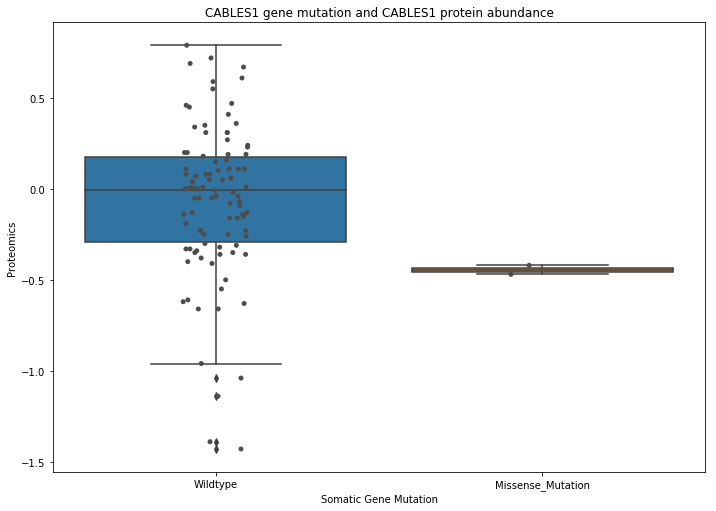

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cablesCross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("CABLES1 gene mutation and " + protein + " protein abundance")
somatic_boxplot = sns.stripplot(data=cablesCross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

### TP53 mutation and CABLES1 proteome abundance (missense only)

In [10]:
gene = "TP53"
protein = "CABLES1"

cablesCross = CPTAC.compare_mutations(proteomics, protein, gene)
cablesCross = cablesCross.loc[cablesCross['Patient_Type'] == 'Tumor'][["Mutation", protein]].dropna(axis=0)

CABLES1mutated = cablesCross.loc[cablesCross["Mutation"] == "Missense_Mutation"]
CABLES1wt = cablesCross.loc[cablesCross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(CABLES1mutated[protein], CABLES1wt[protein])
print("Test for " + protein + ": ")
print(ttest)

Test for CABLES1: 
Ttest_indResult(statistic=-3.3890816898821754, pvalue=0.0010467531155504196)


### TP53 mutation and CABLES1 proteome abundance (truncation only) *below p-cutoff

In [11]:
gene = "TP53"
protein = "CABLES1"

cablesCross = CPTAC.compare_mutations(proteomics, protein, gene)
cablesCross = cablesCross.loc[cablesCross['Patient_Type'] == 'Tumor'][["Mutation", protein]].dropna(axis=0)

CABLES1mutated = cablesCross.loc[(cablesCross["Mutation"] == "Frame_Shift_Del") | (cablesCross["Mutation"] == "Frame_Shift_Ins") | (cablesCross["Mutation"] == "Nonsense_Mutation")]
CABLES1wt = cablesCross.loc[cablesCross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(CABLES1mutated[protein], CABLES1wt[protein])
print("Test for " + protein + ": ")
print(ttest)

Test for CABLES1: 
Ttest_indResult(statistic=-3.7356442692900407, pvalue=0.0003471526801904925)


### TP53 mutation and CABLES1 proteome abundance (all mutation) *below p-cutoff

In [13]:
gene = "TP53"
protein = "CABLES1"

cablesCross = CPTAC.compare_mutations(proteomics, protein, gene)
cablesCross = cablesCross.loc[cablesCross['Patient_Type'] == 'Tumor'][["Mutation", protein]].dropna(axis=0)

CABLES1mutated = cablesCross.loc[cablesCross["Mutation"] != "Wildtype"]
CABLES1wt = cablesCross.loc[cablesCross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(CABLES1mutated[protein], CABLES1wt[protein])
print("Test for " + protein + ": ")
print(ttest)

Test for CABLES1: 
Ttest_indResult(statistic=-4.533885225055603, pvalue=1.6398425638878636e-05)


### TP53 mutation and CABLES1 phosphoproteomics (missense only)

In [14]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis=1)
pcutoff = 0.05 / (len(phosdf.columns) - 1)
print(pcutoff)

for site in phosdf.columns:
    if site is not 'Mutation':
        sitedf = CPTAC.compare_mutations(phos, site, gene)
        mutateddf = sitedf.loc[sitedf['Mutation'] == 'Missense_Mutation'].dropna(axis=0)
        wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
        ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
        if(ttest[1] <= pcutoff):
            print("Test for " + site + ": ")
            print(ttest) 

0.008333333333333333
Test for CABLES1-S290: 
Ttest_indResult(statistic=-2.8992625458884373, pvalue=0.0044490598821727055)
Test for CABLES1-S373: 
Ttest_indResult(statistic=-3.0707852050942472, pvalue=0.002679683456145554)


### TP53 mutation and CABLES1 phosphoproteomics (truncation only)

In [18]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis=1)
pcutoff = 0.05 / (len(phosdf.columns) - 1)

for site in phosdf.columns:
    if site is not 'Mutation':
        sitedf = CPTAC.compare_mutations(phos, site, gene)
        mutateddf = sitedf.loc[(sitedf["Mutation"] == "Frame_Shift_Del") | (sitedf["Mutation"] == "Frame_Shift_Ins") | (sitedf["Mutation"] == "Nonsense_Mutation")]
        wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
        ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
        if(ttest[1] <= pcutoff):
            print("Test for " + site + ": ")
            print(ttest) 

### TP53 mutation and CABLES1 phosphoproteomics (all mutation)

In [20]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis=1)
pcutoff = 0.05 / (len(phosdf.columns) - 1)

for site in phosdf.columns:
    if site is not 'Mutation':
        sitedf = CPTAC.compare_mutations(phos, site, gene)
        mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
        wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
        ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
        if(ttest[1] <= pcutoff):
            print("Test for " + site + ": ")
            print(ttest) 

Test for CABLES1-S109: 
Ttest_indResult(statistic=-2.8247532434645106, pvalue=0.0061595777630189565)
Test for CABLES1-S290: 
Ttest_indResult(statistic=-2.9522248123674846, pvalue=0.003749361674479724)
Test for CABLES1-S373: 
Ttest_indResult(statistic=-3.6581663782611518, pvalue=0.00037860542601428343)
Test for CABLES1-S418: 
Ttest_indResult(statistic=-3.102072399785268, pvalue=0.0023961534820213853)
Test for CABLES1-T415: 
Ttest_indResult(statistic=-3.601529706958785, pvalue=0.0004511904785864429)
